# Purchasing power of English workers from the 16th to the 19th century

### Author: Ana Granizo

The goal of this document is to present an analysis of the purchasing power of English workers from the 16th to the 19th century. To this end, we are going to analyze [William Playfair's](https://en.wikipedia.org/wiki/William_Playfair) data on Wages and the Price of Wheat. Although Playfair did not publish his raw data we can obtain the numbers from a scan of the graph [here](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html).

A few remarks for understanding the data:
- Until 1971, the pound sterling was divided into 20 shillings, and a shilling into 12 pence.
- The wheat price is given in shillings per quarter, a quarter being 15 British pounds or about 6,8 kg.
- Salaries are given in shillings per week.

**Format of the data**  
The data frame has 53 observations on 3 variables: Year, Wheat, and Wages.  
* Variable Year is in intervals of 5 years from 1565 to 1821: a numeric value  
* Variable Wheat is the price of Wheat (Shillings/Quarter bushel\*): a numeric value  
* Variable Wage is the weekly wage (Shillings): a numeric value  

\* A bushel is an imperial and US customary unit of volume, based upon an earlier measure of dry capacity. Source: [https://en.wikipedia.org/wiki/Bushel](https://en.wikipedia.org/wiki/Bushel)

## Get and clean the data
First, we need to import the libraries that we are going to use

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import urllib.request
import numpy as np

Now, we are going to download and present the data

In [2]:
data_url="https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
file = "Wheat.csv"
if not os.path.exists(file):
    urllib.request.urlretrieve(data_url, file)
df = pd.read_csv(file)
df

,Unnamed: 0,Year,Wheat,Wages
0,1,1565,41.0,5.00
1,2,1570,45.0,5.05
2,3,1575,42.0,5.08
3,4,1580,49.0,5.12
4,5,1585,41.5,5.15
5,6,1590,47.0,5.25
6,7,1595,64.0,5.54
7,8,1600,27.0,5.61
8,9,1605,33.0,5.69
9,10,1610,32.0,5.78


As we can see, we have the first column labeled as "Unnamed: 0" and an extra column for the index. So we are going to rename the "Unnamed: 0" row as “index” and set it as the index column.

In [3]:
df = df.rename({'Unnamed: 0': 'index'}, axis=1)
df = df.set_index('index')
df.iloc[:3]

,Year,Wheat,Wages
index,,,
1,1565,41.0,5.00
2,1570,45.0,5.05
3,1575,42.0,5.08


In a quick look at the data, we can see that there are some missing values in the Wages column. We could simply delete those 3 affected rows, but it is better if we look up and delete all the rows that have an empty value. With this, we generalize the solution and we do not expose ourselves to the fact that there may be more empty values that we did not see.

In [4]:
df = df.dropna().copy()

Now we review the information in our data frame to check that everything is in order. As we can see, the “Years” column is in integers and the columns “Wheat” and “Wages” are float. And we have now only 50 entries because we deleted the 3 rows that had empty values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    50 non-null     int64  
 1   Wheat   50 non-null     float64
 2   Wages   50 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


Looking at the data, we can see that apparently the data is sampled every 5 years. But we must make sure that this is the case for all the data-frame and determine if maybe there are some years missing.

In [6]:
first_year = df['Year'].iloc[0]
for year in df["Year"].iloc[1:]:
    diff_year = year - first_year
    first_year = year
    if (diff_year!=5):
        print("There are some years missing")

Now that we check that all the data is every 5 years we can start analyzing the data.

## 1. Reproduce Playfair's graph from the numerical data.
We are first going to reproduce the original Playfair's graph. Where the wheat price is presented in grey bars and the salarie per weak by a blue surface delimited by a red curve.  
As we can see in this graps, the wheat price was a bit regular with little ups and downs from 1600 to 1795. From 1795 there is a peak of growth, going from 50 Shillings/Quarter bushel to around 80 Shillings/Quarter bushel.  
Regarding the weekly work wage, we can see that the curve is growing uniformly over the years.  

We can see the original graph after the plot we created. As we can observe, our plot differs a bit from the original in that it does not have the last 3 values of the price of wheat, because we deleted those rows due to the fact that they did not have the values corresponding to the salary.

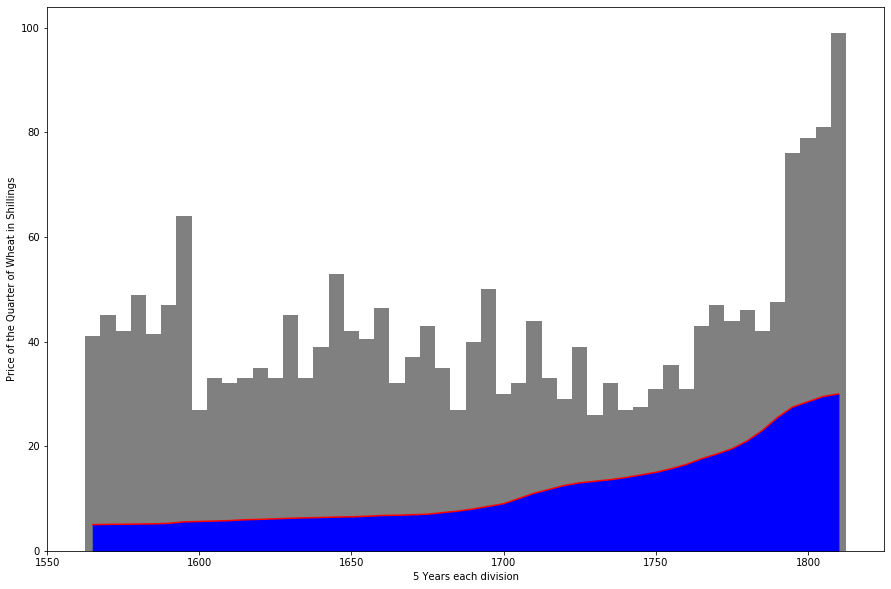

In [7]:
fig = plt.figure(figsize = (15, 10))
plt.bar(df['Year'], df['Wheat'], color ='grey', width = 5,zorder=1) 
plt.plot(df['Year'], df['Wages'], color ='red',zorder=2)
plt.fill_between(df['Year'], df['Wages'], color ='blue',zorder=2)
  
plt.xlabel("5 Years each division") 
plt.ylabel("Price of the Quarter of Wheat in Shillings") 
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png)

## 2. Improve the presentation of the data.

Because the original graph had a failure at using only a generalized Y-axis as “shillings”, both for “shillings per quarter” and for “shillings per week”, we are going to improve this problem and give their own scale for each value. The left axis shows the scale for "shillings per quarter" and the right one for "shillings per week".

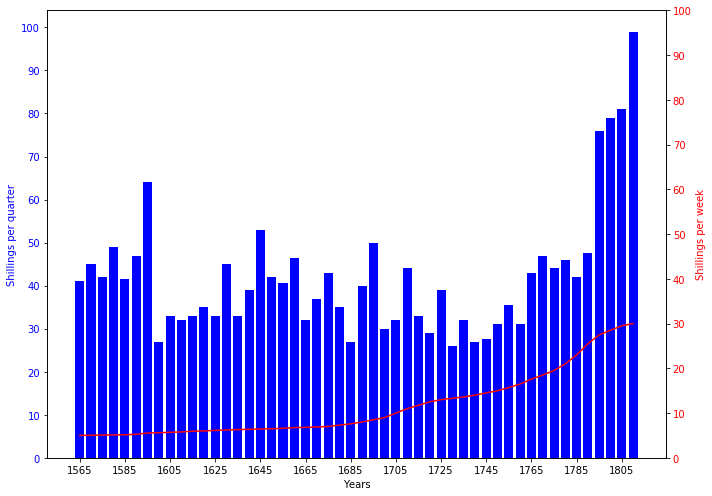

In [8]:
fig, ax1 = plt.subplots(figsize = (10, 7))
ax1.set_xlabel('Years')
ax1.set_ylabel('Shillings per quarter', color="blue")
ax1.bar(df['Year'], df['Wheat'], color="blue", width = 4)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.xaxis.set_ticks(np.arange(1565, 1820, 20))
ax1.yaxis.set_ticks(np.arange(0, 110, 10))
ax2 = ax1.twinx()
ax2.set_ylabel('Shillings per week', color="red")
ax2.plot(df['Year'], df['Wages'], color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.yaxis.set_ticks(np.arange(0, 110, 10))

fig.tight_layout()
plt.show()

As we can see, now each of the values has its own axis marked on the graph, but we must consider that this does not mean that there is a relationship between the two scale-axes since one is in "shillings per quarter" and the other "Shillings per week".

## 3. Highlight the feature that the workers' purchasing power had increased over time.

In order to highlight the fact that the workers' purchasing power had increased over time, first, we need to calculate the purchasing power, which is defined as the quantity of wheat a worker can buy with a weekly salary, as a function of time. So, we must divide the weekly wage by the price of wheat. Since this price of the wheat is given in Shillings per quarter bushel and, as we mentioned at the beginning of the document, a quarter is about 6.8 kg, we need to divide the value of wheat by 6.8 to obtain the value of wheat in Shillings per kg. And by dividing the weekly wage by the price of wheat in kg we obtain the number of kg of wheat that can be bought weekly.

In [9]:
df['PurchasingPower'] = df['Wages']/(df['Wheat']/6.8)
df.iloc[:3]

,Year,Wheat,Wages,PurchasingPower
index,,,,
1,1565,41.0,5.00,0.829268
2,1570,45.0,5.05,0.763111
3,1575,42.0,5.08,0.822476


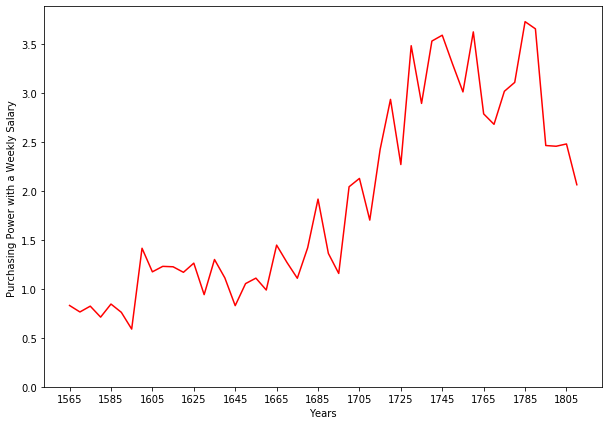

In [10]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(df['Year'], df['PurchasingPower'], color ='red') 
ax.xaxis.set_ticks(np.arange(1565, 1820, 20))
ax.yaxis.set_ticks(np.arange(0, 4, 0.5))
ax.set_xlabel("Years") 
ax.set_ylabel("Purchasing Power with a Weekly Salary ") 

plt.show()

Looking at this graph we can notice that the curve is in fact increasing, which means that the Purchasing Power did increase over the years, but around 1785 it seems to be starting to decrease.  
To do a deeper analysis, now we are going to plot a graph to show booth the wheat price and the salary on two different axes, without an explicit time axis. But in order not to lose the information of the advancement of time, we are going to plot the points with the color corresponding to the years.

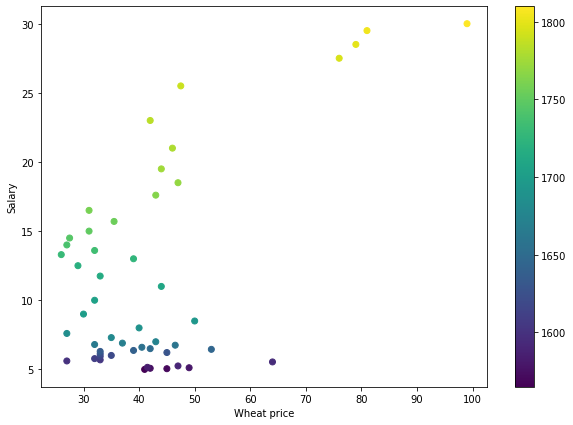

In [11]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(df['Wheat'], df['Wages'], c=df['Year'], alpha=1.5, cmap='viridis')
plt.xlabel("Wheat price") 
plt.ylabel("Salary")
plt.colorbar();

This graph shows us that as the years go by, the salary increases. But the wheat remains around the same values, between 25 and 50, except for the last values from around 1785 when the price of wheat increases over 70 shillings per kg.  
This corroborates the conclusion we got from the previous graph for the Purchasing Power. As the years went by, the salaries increased and the wheat price remained the same, which generated more purchasing power, with a decrease around 1785.  

The Purchasing Power graph looks clearest because it is easier to get the conclusion that the purchasing power is rising when the curve on the graph rises. While in the other graph it is not so intuitive without an analysis of the graph.